In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_name = '124-001'
image_file = '124-Fg001-R-C01-R01-D10112011-T102020-LR638_006.dng'
folder_path = f'data/dss_dataset/ms_dng_images/{folder_name}'
image_path = os.path.join(folder_path, image_file)

In [3]:
image_path

'data/dss_dataset/ms_dng_images/124-001/124-Fg001-R-C01-R01-D10112011-T102020-LR638_006.dng'

In [16]:
file = open(image_path, 'rb')
rows = 5412
cols = 7216
nparr = np.fromfile(file, dtype=np.uint16,count=rows*cols)
npimg = nparr.reshape((rows, cols))
file.close()

In [17]:
npimg.shape

(5412, 7216)

In [19]:
np.max(npimg)

65295

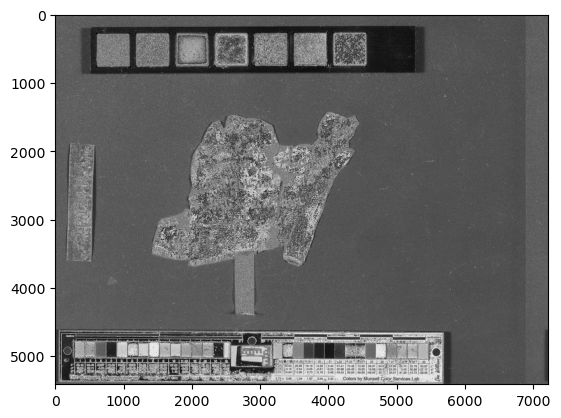

In [21]:
# Pay attention that the whole image is shifted to the left 
# because we read the file without considering the EXIF data.
plt.imshow(npimg,'gray')

In [25]:
import exifread
# Open image file for reading (must be in binary mode)
f = open(image_path, 'rb')

# Return Exif tags
tags = exifread.process_file(f)

Possibly corrupted field Model in Image IFD


In [26]:
tags

{'Image SubfileType': (0x00FE) Long=Full-resolution Image @ 18,
 'Image ImageWidth': (0x0100) Short=7216 @ 30,
 'Image ImageLength': (0x0101) Short=5412 @ 42,
 'Image BitsPerSample': (0x0102) Short=16 @ 54,
 'Image Compression': (0x0103) Short=Uncompressed @ 66,
 'Image PhotometricInterpretation': (0x0106) Short=34892 @ 78,
 'Image Make': (0x010F) ASCII=MegaVision S/E6 @ 386,
 'Image Model': (0x0110) ASCII=b'E6 SN:31R094428200/L, ... ] @ 402,
 'Image StripOffsets': (0x0111) Long=28209 @ 114,
 'Image Orientation': (0x0112) Short=Rotated 180 @ 126,
 'Image SamplesPerPixel': (0x0115) Short=1 @ 138,
 'Image RowsPerStrip': (0x0116) Short=5412 @ 150,
 'Image StripByteCounts': (0x0117) Long=78105984 @ 162,
 'Image XResolution': (0x011A) Ratio=30479999/100000 @ 468,
 'Image YResolution': (0x011B) Ratio=30479999/100000 @ 476,
 'Image PlanarConfiguration': (0x011C) Short=1 @ 198,
 'Image ResolutionUnit': (0x0128) Short=Pixels/Inch @ 210,
 'Image DateTime': (0x0132) ASCII=2011:11:10 10:20:33 @ 48

In [27]:
# Use rawpy to read the dng image together with considering its EXIF data.
import rawpy

In [56]:
with rawpy.imread(image_path) as raw:
    raw_image = raw.raw_image.copy()   
    raw.close()

In [57]:
raw_image

array([[ 89,  93,  87, ...,  61,  58,  69],
       [112, 102, 118, ...,  77,  75,  79],
       [114, 108, 108, ...,  87,  81,  79],
       ...,
       [ 87,  93,  92, ...,  77,  82,  85],
       [ 92,  86,  86, ...,  75,  75,  84],
       [ 98, 101, 101, ...,  92,  84,  84]], dtype=uint16)

In [59]:
np.max(raw_image)

3932

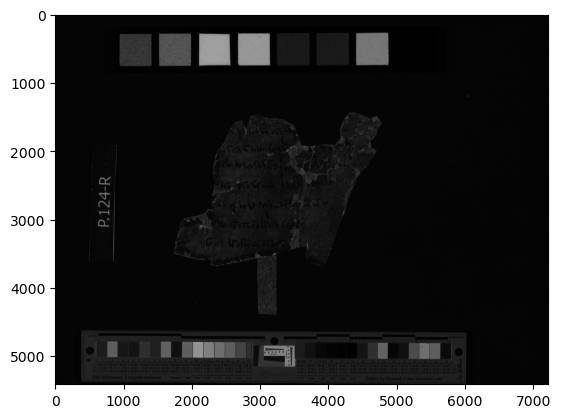

In [60]:
plt.imshow(raw_image,'gray')

In [73]:
# use EXIF to correct the orientation
# Open the DNG file using rawpy
with rawpy.imread(image_path) as raw:
    # Extract the Exif orientation tag (if it exists)
    exif_orientation = raw.extract_orientation()
    raw.close()
    
# Rotate the image based on the Exif orientation
if exif_orientation == 3:
    raw_image = cv2.rotate(raw_image, cv2.ROTATE_180)
elif exif_orientation == 6:
    raw_image = cv2.rotate(raw_image, cv2.ROTATE_90_CLOCKWISE)
elif exif_orientation == 8:
    raw_image = cv2.rotate(raw_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Save the corrected image using OpenCV
cv2.imwrite('raw_image.png', raw_image)

AttributeError: 'rawpy._rawpy.RawPy' object has no attribute 'extract_orientation'

In [63]:
# use postprocess() to correct the image according to EXIF data
# default parameeters are here: https://letmaik.github.io/rawpy/api/rawpy.Params.html
with rawpy.imread(image_path) as raw:
    corrected_img = raw.postprocess()  
    raw.close()

In [65]:
 corrected_img.shape

(5412, 7216, 1)

In [69]:
np.max(corrected_img)

255

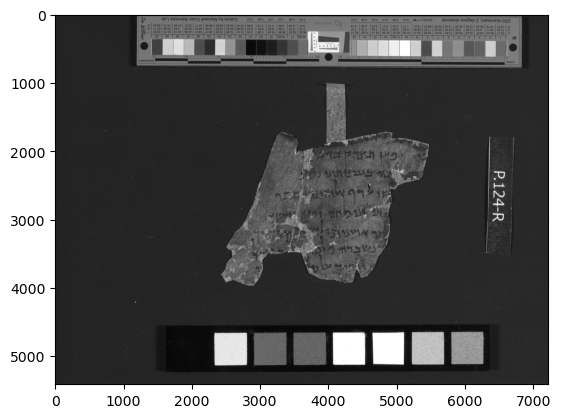

In [67]:
# Pay attention that the orientation was corrected.
plt.imshow(corrected_img,'gray')

In [48]:
with rawpy.imread(path) as raw:
    raw = rawpy.imread(path)
    lin = raw.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16)
    raw.close()


In [49]:
lin.shape

(5412, 7216, 1)

In [51]:
np.max(lin)

65535

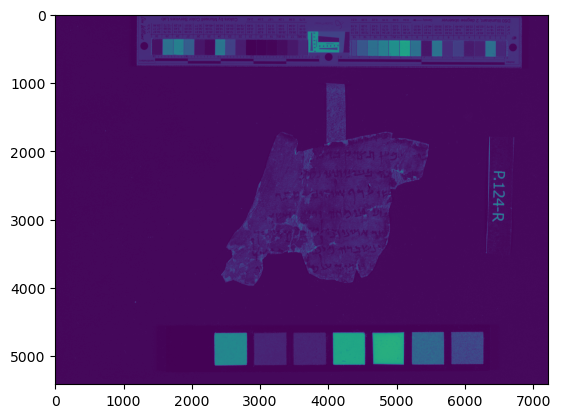

In [60]:
plt.imshow(lin)

In [61]:
cv2.imwrite('lin.png',lin)

True

In [63]:
hist=np.histogram(lin)

(array([33517189,  3854710,   397449,   420211,   377494,   311102,
          174676,       56,       32,       73]),
 array([5.00000e+01, 6.59850e+03, 1.31470e+04, 1.96955e+04, 2.62440e+04,
        3.27925e+04, 3.93410e+04, 4.58895e+04, 5.24380e+04, 5.89865e+04,
        6.55350e+04]))

In [124]:
with rawpy.imread(path) as raw:
    raw_image = raw.raw_image.copy()

   # lin = raw.postprocess(user_sat=4095,use_camera_wb=True,output_bps=16)
    raw.close()

In [125]:
np.max(raw_image)

3932

In [126]:
raw_image

array([[ 89,  93,  87, ...,  61,  58,  69],
       [112, 102, 118, ...,  77,  75,  79],
       [114, 108, 108, ...,  87,  81,  79],
       ...,
       [ 87,  93,  92, ...,  77,  82,  85],
       [ 92,  86,  86, ...,  75,  75,  84],
       [ 98, 101, 101, ...,  92,  84,  84]], dtype=uint16)

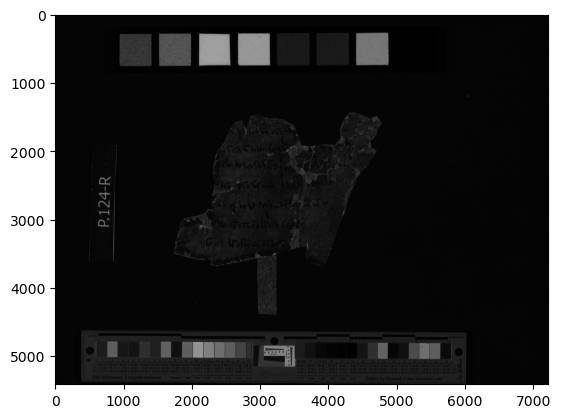

In [127]:
plt.imshow(raw_image,'gray')

In [129]:
cv2.imwrite('raw_image.png',raw_image)

True

In [130]:
raw_image.shape

(5412, 7216)